# Semua Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import models
from babel.numbers import format_currency
sns.set(style='dark')

# Analisis Data Obesitas

Import dataset Obesitas

In [2]:
data_obesitas = pd.read_csv('https://raw.githubusercontent.com/Bhayazeed/Dataset_submisi_dicoding_ziid/refs/heads/main/ObesityDataSet.csv')

In [3]:
data_obesitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data_obesitas.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data_obesitas.duplicated().sum()

24

In [6]:
data_obesitas.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [7]:
data_obesitas.drop_duplicates(inplace=True)

 Cek keseimbangan data

In [8]:
Cek_balanced_data = data_obesitas['NObeyesdad'].value_counts(normalize=True)
Cek_balanced_data

,proportion
NObeyesdad,
Obesity_Type_I,0.168184
Obesity_Type_III,0.155247
Obesity_Type_II,0.142310
Overweight_Level_II,0.138955
Normal_Weight,0.135122
Overweight_Level_I,0.132247
Insufficient_Weight,0.127935


Menampilkan jumlah Obesitas berdasarkan tipe

<ipython-input-9-9c153ccde290>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NObeyesdad', data=data_obesitas, order=data_obesitas['NObeyesdad'].value_counts().index, palette="viridis")


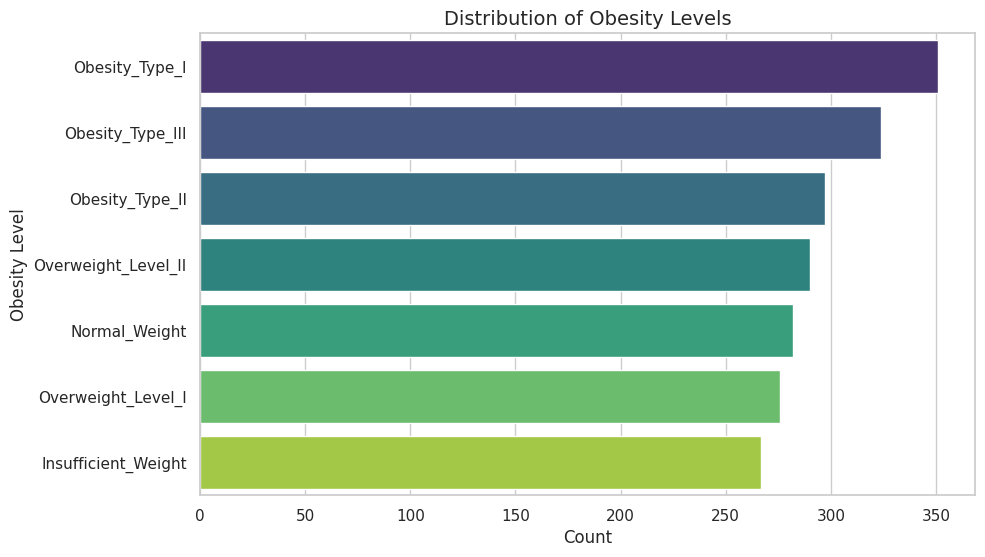

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=data_obesitas, order=data_obesitas['NObeyesdad'].value_counts().index, palette="viridis")
plt.title('Distribution of Obesity Levels', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Obesity Level')
plt.show()

# Pembuatan Model Obesitas

Drop kolom data yang tidak digunakan

In [10]:
data_obesitas = data_obesitas.drop(columns=['MTRANS'])

Mapping kolom float menjadi int

In [11]:
gender_mapping = {'Male': 1, 'Female': 0}
caec_mapping = {'Always': 1, 'Sometimes': 0.5, 'no': 0}
calc_mapping = {'Frequently': 1, 'Sometimes': 0.5, 'no': 0}
yes_no_mapping = {'yes': 1, 'no': 0}

data_obesitas['Gender'] = data_obesitas['Gender'].map(gender_mapping)
data_obesitas['CAEC'] = data_obesitas['CAEC'].map(caec_mapping)
data_obesitas['CALC'] = data_obesitas['CALC'].map(calc_mapping)
data_obesitas['family_history_with_overweight'] = data_obesitas['family_history_with_overweight'].map(yes_no_mapping)
data_obesitas['FAVC'] = data_obesitas['FAVC'].map(yes_no_mapping)
data_obesitas['SMOKE'] = data_obesitas['SMOKE'].map(yes_no_mapping)
data_obesitas['SCC'] = data_obesitas['SCC'].map(yes_no_mapping)

Cek Data setelah mapping

In [12]:
data_obesitas.duplicated().sum()

0

In [13]:
data_obesitas.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,236
SMOKE,0


Setelah mapping terdapat nilai NaN dari salah satu kolom lalu lakukan isi value

In [14]:
data_obesitas['CAEC'].fillna(data_obesitas['CAEC'].mean(), inplace=True)

<ipython-input-14-c44aedc2ea56>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_obesitas['CAEC'].fillna(data_obesitas['CAEC'].mean(), inplace=True)


In [15]:
data_obesitas['CALC'].fillna(data_obesitas['CALC'].mean(), inplace=True)

<ipython-input-15-aa2b00fd8efb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_obesitas['CALC'].fillna(data_obesitas['CALC'].mean(), inplace=True)


Normalisasi data height dan weight

In [16]:
data_obesitas['Height'] = data_obesitas['Height'] / data_obesitas['Height'].max()
data_obesitas['Weight'] = data_obesitas['Weight'] / data_obesitas['Weight'].max()

Mapping kolom Y menjadi Int

In [17]:
weight_category_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data_obesitas['NObeyesdad'] = data_obesitas['NObeyesdad'].map(weight_category_mapping)

Menentukan X dan y

In [18]:
X = data_obesitas.drop(columns=['NObeyesdad']).values
y = data_obesitas['NObeyesdad'].values

In [19]:
X = X.astype(np.float32)
y = y.astype(np.int32)

Split data menjadi train dan test menggunakan stratified split

In [20]:
data = X
labels = y

def stratified_split(data, labels, validation_split=0.2):
    labels = labels.reshape(-1)

    unique_classes, class_counts = np.unique(labels, return_counts=True)
    train_data, train_labels = [], []
    val_data, val_labels = [], []

    for class_label in unique_classes:
        class_indices = np.where(labels == class_label)[0]
        np.random.shuffle(class_indices)

        val_size = int(len(class_indices) * validation_split)

        class_val_indices = class_indices[:val_size]
        class_train_indices = class_indices[val_size:]

        train_data.append(data[class_train_indices])
        train_labels.append(labels[class_train_indices])
        val_data.append(data[class_val_indices])
        val_labels.append(labels[class_val_indices])

    X_train = np.concatenate(train_data)
    y_train = np.concatenate(train_labels)
    X_test = np.concatenate(val_data)
    y_test = np.concatenate(val_labels)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = stratified_split(data, labels, validation_split=0.2)

Membuat model menggunakan Neuron network dan Dense Layer

In [21]:
model = models.Sequential([
    # Input layer
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(7, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
""" early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    restore_best_weights=True
) """

" early_stopping = EarlyStopping(\n    monitor='val_accuracy',\n    patience=10,\n    mode='max',\n    restore_best_weights=True\n) "

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test)) #callbacks=[early_stopping]

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1683 - loss: 3.3436 - val_accuracy: 0.1277 - val_loss: 2.4794
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1993 - loss: 3.0083 - val_accuracy: 0.2795 - val_loss: 2.2871
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2664 - loss: 2.7820 - val_accuracy: 0.3831 - val_loss: 2.1320
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3174 - loss: 2.6266 - val_accuracy: 0.4120 - val_loss: 2.0341
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3137 - loss: 2.5363 - val_accuracy: 0.4337 - val_loss: 1.9460
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3408 - loss: 2.3973 - val_accuracy: 0.4747 - val_loss: 1.8428
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3617 - loss: 2.2734 - val_accuracy: 0.4747 - val_loss: 1.8243
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3501 - loss: 2.3244 - val_

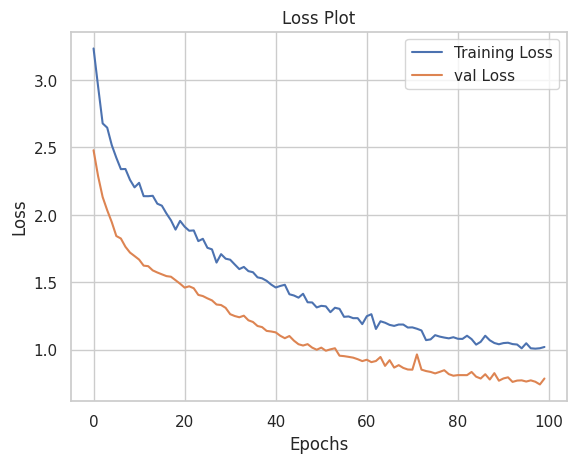

In [25]:
plt.title('Loss Plot')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Menampilkan grafik
plt.show()

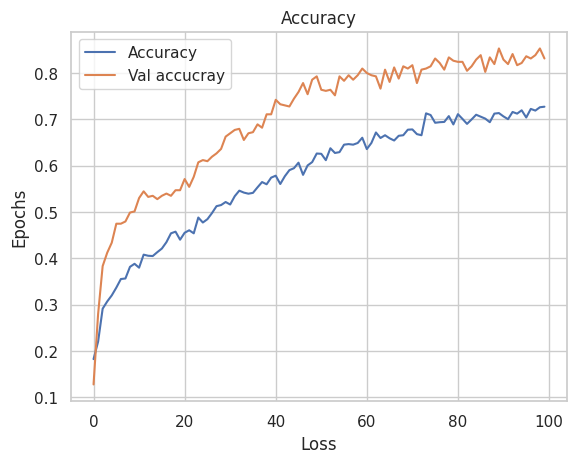

In [26]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val accucray')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.8298 
Test accuracy: 0.8313252925872803


In [28]:
model.save('weight_category_model.h5')

In [29]:
# Load the model
model = tf.keras.models.load_model('weight_category_model.h5')

# Mapping for prediction output
weight_categories = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

# Define normalization functions for height and weight
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

def predict_weight_category():
    print("Enter the following details to predict the weight category:")

    # Gather user inputs for each feature
    gender = int(input("Gender (Male=1, Female=0): "))
    age = float(input("Age: "))
    height = float(input("Height (in meters): "))
    weight = float(input("Weight (in kg): "))
    family_history_with_overweight = int(input("Family history with overweight (Yes=1, No=0): ")) #-
    favc = int(input("Frequently consume high-caloric food (Yes=1, No=0): ")) #-
    fcvc = float(input("Frequency of vegetable consumption (0-3 scale): "))
    ncp = float(input("Number of main meals per day: ")) #-
    caec = float(input("Consumption of food between meals (Always=1, Sometimes=0.5, No=0): ")) #-
    smoke = int(input("Do you smoke? (Yes=1, No=0): "))
    ch2o = float(input("Daily water consumption (liters): ")) #-
    scc = int(input("Monitor calories (Yes=1, No=0): ")) #-
    faf = float(input("Physical activity frequency (hours per week): "))
    tue = float(input("Time using technology devices (hours per day): ")) #-
    calc = float(input("Alcohol consumption (Often=1, Sometimes=0.5, No=0): "))

    # Normalize height and weight
    # Assume typical ranges for normalization (adjust as necessary based on data)
    normalized_height = normalize(height, min_val=1.0, max_val=2.5)# assuming height in meters
    normalized_weight = normalize(weight, min_val=30, max_val=200)# assuming weight in kg

    # Create an input array from the user inputs
    input_data = np.array([[gender, age, height, weight, family_history_with_overweight,
                            favc, fcvc, ncp, caec, smoke, ch2o, scc, faf, tue, calc]])

    # Make a prediction
    prediction = model.predict(input_data)
    weight_category = np.argmax(prediction, axis=1)[0]

    # Output the result
    print(f"Predicted weight category: {weight_categories[weight_category]}")

# Call the function to get user input and make a prediction
predict_weight_category()


Enter the following details to predict the weight category:


KeyboardInterrupt: Interrupted by user